In [1]:
import sys
sys.path.append('/home/chris/repos/financial_analysis/')
import pandas as pd

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from credentials import *

### Testing the Alpha Vantage API by pulling DAX data

In [3]:
import requests
import json
import pprint

url = "https://www.alphavantage.co/query"
outFile = '../newfile.csv'
function = "TIME_SERIES_DAILY"
symbol = "^GSPC"
api_key = key

data = { "function": function, 
         "symbol": symbol, 
         "apikey": api_key,
         "outputsize": 'compact',
         "datatype": 'csv'} 
page = requests.get(url, params = data)
#pprint.pprint(page.json())

with open(outFile, 'w') as oF:
    oF.write(page.text)

In [4]:
dax = 'DAX'
df = pd.read_csv('../newfile.csv',usecols=["timestamp", "close"]).rename(columns={'close' : 'close_'+dax})

In [5]:
df.head(n=5)

,timestamp,close_DAX
0,2018-03-06,2728.1201
1,2018-03-05,2720.9399
2,2018-03-02,2691.2500
3,2018-03-01,2677.6699
4,2018-02-28,2713.8301


In [6]:
df.loc[(df==0).any(axis=1)].index

Int64Index([], dtype='int64')

In [7]:
df = df.drop(df.loc[(df==0).any(axis=1)].index)
df = df.iloc[::-1]

In [8]:
df.head(n=3)

,timestamp,close_DAX
99,2017-10-11,2555.2400
98,2017-10-12,2550.9299
97,2017-10-13,2553.1699


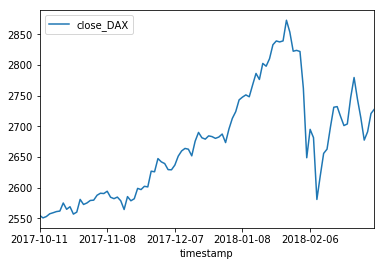

In [9]:
df.plot(x='timestamp',y='close_DAX')

### Now pull a bunch of relevant indices

* Plot time series
* Plot their correlations

In [10]:
indices = [
    '^GSPC', #S&P 500
    '^DJI',  #DowJones 30
    #'^IXIC', #NASDAQ
    '^NYA', #NYSE COMPOSITE (DJ)
    '^XAX',  #NYSE AMEX COMPOSITE INDEX
    #'^BATSK',#BATS 1000 Index
    '^RUT',  #Russell 2000
    '^VIX',  #Vix
    '^FTSE', #FTSE 100
    '^GDAXI',#DAX
    '^FCHI', #CAC 40
    '^STOXX50E', #STOXX 50
    '^N100', #EURONEXT 100
    '^BFX',  #BEL 20 Brussels
    '^N225', #Nikkei
    '^HSI'  #Hangseng
    
    
]

In [11]:
url = "https://www.alphavantage.co/query"
index_data_dir = '../data/'
function = "TIME_SERIES_DAILY"
symbol = "^GDAXI"
api_key = key

for index in indices:
    data = { "function": function, 
         "symbol": index, 
         "apikey": api_key,
         "outputsize": 'compact',
         "datatype": 'csv'} 
    page = requests.get(url, params = data)
    with open(index_data_dir + 'data_' + index.strip('^') + '.csv', 'w') as oF:
        oF.write(page.text)

In [12]:
import glob

allFiles = glob.glob(index_data_dir + "*.csv")
df_indices = pd.DataFrame()
list_ = []
for file_ in allFiles:
    name = str(str(file_).split('_')[1]).split('.')[0]
    print(name)
    df = pd.read_csv(file_,usecols=["timestamp", "close"]).rename(columns={'timestamp' : 'timestamp_'+name, 'close' : 'close_'+name})
    df = df.drop(df.loc[(df==0).any(axis=1)].index)
    df = df.iloc[::-1]
    list_.append(df)
df_indices = pd.concat(list_, axis=1)
#Drop redundant timestamps
df_indices

RUT
GSPC
BFX
N225
HSI
DJI
STOXX50E
GDAXI
NYA
VIX
FTSE
XAX
FCHI
N100


,timestamp_RUT,close_RUT,timestamp_GSPC,close_GSPC,timestamp_BFX,close_BFX,timestamp_N225,close_N225,timestamp_HSI,close_HSI,...,timestamp_VIX,close_VIX,timestamp_FTSE,close_FTSE,timestamp_XAX,close_XAX,timestamp_FCHI,close_FCHI,timestamp_N100,close_N100
0,2018-03-06,1562.2000,2018-03-06,2728.1201,2018-03-07,3906.1101,2018-03-07,21252.7207,2018-03-07,30196.9199,...,2018-03-06,18.36,2018-03-07,7150.5000,2018-03-06,2494.0400,2018-03-07,5159.3501,2018-03-07,1007.1800
1,2018-03-05,1546.0500,2018-03-05,2720.9399,2018-03-06,3916.4099,2018-03-06,21417.7598,2018-03-06,30510.7305,...,2018-03-05,18.73,2018-03-06,7146.7998,2018-03-05,2470.5500,2018-03-06,5170.2300,2018-03-06,1009.2500
2,2018-03-02,1533.1700,2018-03-02,2691.2500,2018-03-05,3907.0400,2018-03-05,21042.0898,2018-03-05,29886.3906,...,2018-03-02,19.59,2018-03-05,7116.0000,2018-03-02,2449.7400,2018-03-05,5167.2300,2018-03-05,1006.2700
3,2018-03-01,1507.3900,2018-03-01,2677.6699,2018-03-02,3869.1799,2018-03-02,21181.6406,2018-03-02,30583.4492,...,2018-03-01,22.47,2018-03-02,7069.8999,2018-03-01,2447.3899,2018-03-02,5136.5801,2018-03-02,998.1800
4,2018-02-28,1512.4500,2018-02-28,2713.8301,2018-03-01,3943.8501,2018-03-01,21724.4707,2018-03-01,31044.2500,...,2018-02-28,19.85,2018-03-01,7175.6001,2018-02-28,2452.2600,2018-03-01,5262.5601,2018-03-01,1018.4400
5,2018-02-27,1536.4700,2018-02-27,2744.2800,2018-02-28,3994.4500,2018-02-28,22068.2402,2018-02-28,30844.7207,...,2018-02-27,18.59,2018-02-28,7231.8999,2018-02-27,2496.6699,2018-02-28,5320.4902,2018-02-28,1028.3400
6,2018-02-26,1559.3300,2018-02-26,2779.6001,2018-02-27,4010.1699,2018-02-27,22389.8594,2018-02-27,31268.6602,...,2018-02-26,15.80,2018-02-27,7282.5000,2018-02-26,2525.2100,2018-02-27,5343.9302,2018-02-27,1032.0800
7,2018-02-23,1549.1899,2018-02-23,2747.3000,2018-02-26,3992.5000,2018-02-26,22153.6309,2018-02-26,31498.5996,...,2018-02-23,16.49,2018-02-26,7289.6001,2018-02-23,2504.5801,2018-02-26,5344.2598,2018-02-26,1032.9900
8,2018-02-22,1529.9900,2018-02-22,2703.9600,2018-02-23,3972.5300,2018-02-23,21892.7793,2018-02-23,31267.1699,...,2018-02-22,18.72,2018-02-23,7244.3999,2018-02-22,2489.6799,2018-02-23,5317.3701,2018-02-23,1026.7100
9,2018-02-21,1531.8400,2018-02-21,2701.3301,2018-02-22,3978.8501,2018-02-22,21736.4395,2018-02-22,30965.6797,...,2018-02-21,20.02,2018-02-22,7252.3999,2018-02-21,2494.3701,2018-02-22,5309.2300,2018-02-22,1024.0200


In [13]:
dax = '^N100'
df = pd.read_csv('../data/data_N100.csv',usecols=["timestamp", "close"]).rename(columns={'close' : 'close_'+dax})

In [14]:
df_indices.shape

(100, 28)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f03382320f0>,
      dtype=object)

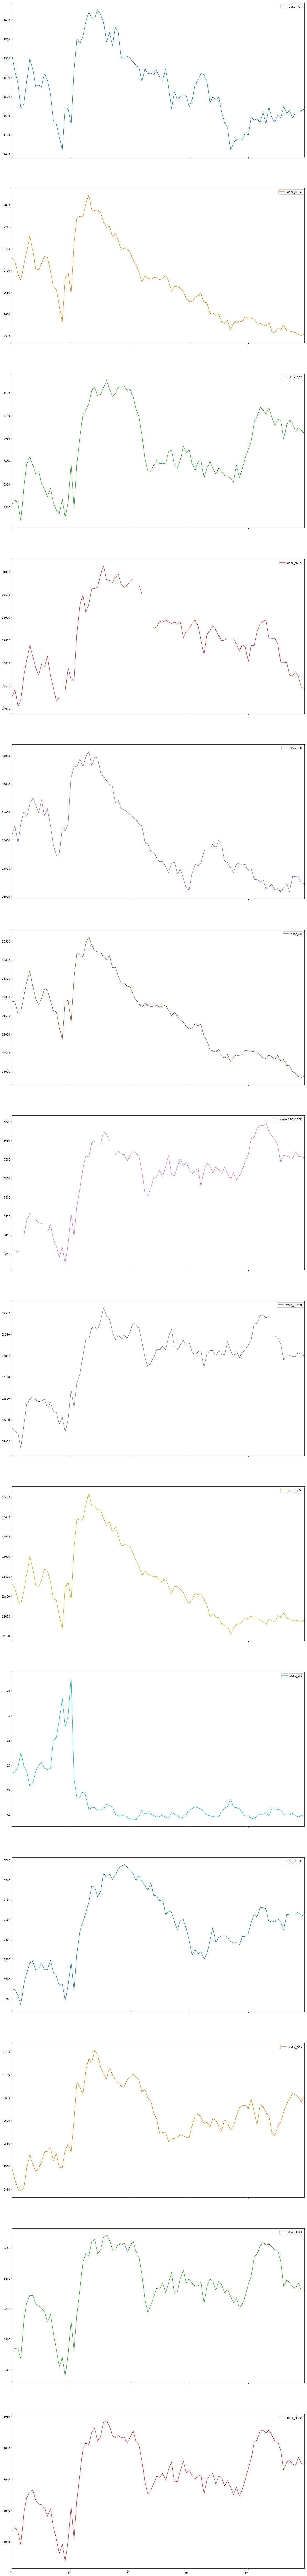

In [15]:
import matplotlib.pyplot as plt

df_indices.plot(subplots=True,figsize=(20, 200))
#plt.xticks(df_indices.timestamp)

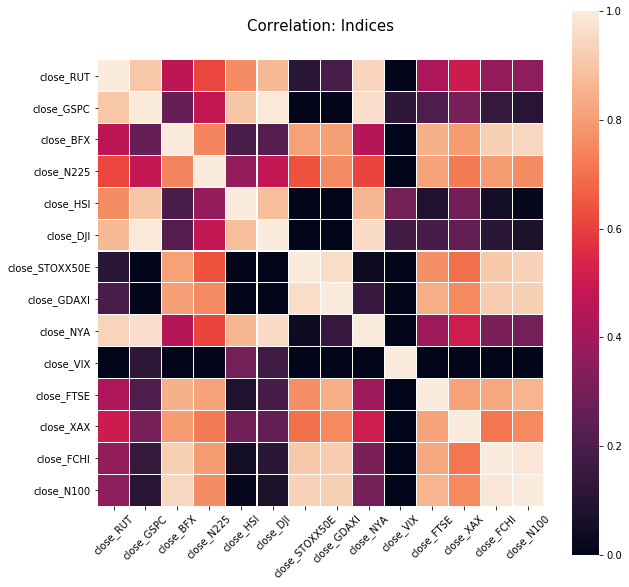

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

df_indices = df_indices.filter(regex='close', axis=1)


plt.figure(figsize=(10,10))
plt.title('Correlation: Indices', y=1.05, size=15)
plot = sns.heatmap(df_indices.corr(), xticklabels=df_indices.columns, yticklabels=df_indices.columns,  linewidths=0.1,vmax=1.0,vmin=0, square=True, linecolor='white')
#plot.set_xticklabels(plot.get_xticklabels(),rotation=30)
#plot.set_ylabel('')
#plot.set_xlabel('')
plt.setp(plot.get_xticklabels(), rotation=45)
plt.setp(plot.get_yticklabels(), rotation=0)

plt.show()



### First simple predictive model

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import LSTM,Dense

In [24]:
np.random.seed(7)

In [28]:
df_indices = df_indices.fillna(0).astype('float32')
#normalization
scaler = MinMaxScaler(feature_range=(0, 1))
df_indices = scaler.fit_transform(df_indices)

In [29]:
# split into train and test sets
train_size = int(len(df_indices) * 0.67)
test_size = len(df_indices) - train_size
train, test = df_indices[0:train_size,:], df_indices[train_size:len(df_indices),:]
print(len(train), len(test))

67 33
